# **Dynamic Time Warping algorithm for analyzing audio**


####***Hashim Hashimov, Kayahan Kaya - Computer Science MSc.***



<h2>Purpose</h2>
<p>
In this project, we aimed to analyze audio data with the help of Dynamic Time Warping (DTW) algorithm in order to grab similarities between audio patterns. <br/>
Additionally, we will test different types of audio pieces to understand what is going on the underneath.<br/>
</p>
<h2>Introduction</h2>
<p style="font-size: 17px; font-family: Times New Roman;">
  There are many problems related to the audio signal processing. These improvements cater a lot of new opportunities in the technology field such as creation of sound cards, speech recognition, audio analyzing, and so on. 
<br/>
Eventually, in this project, we are going to research the Dynamic Time Warping algorithm, how to read audio files, what is chromas, What do graphs mean after result of DTW algorithm, and so on. First we will use 2 audio files to analyze the reading, processing, analyzing, visualizing process and after that we will use many audio files in 7 categories to understand is it important or not.

</p>

<h2>What is Dynamic Time Warping</h2>
<p>
To begin with, in practise, we would like to compare different serieses which have different length (timing variation). For example, they can be music, speechs, stock value series and so on. We can account them input signals x and y.
<br/>
In music perspective, x and y might have the same chords, instruments with the different timing, length. Because of these differences, we are not able to use pairwise distances. 
<br/>
Dynamic Time Warping (DTW), came to help in this matter. It is an algorithm that is useful to grab similarities between 2 sequence of data even though they have time and length differences.
For 2 sequences such as <br/>
<center>
x[n], n ∈ {0,...,Nx−1} and y [n], n ∈ {0,...,Ny−1}
</center>
<br/>
DTW algorithm will return a sequence of coordinate pairs which that point is similar for both input sequences.
<br/>
Word of mouth of DTW application is automatic speech recognition.
<br/>
In order to work with DTW, we will take advantages of some libraries such as dtaidistance, librosa and so on. 
We will explain the process before using them.
<img src="https://databricks.com/wp-content/uploads/2019/04/Euclidean_vs_DTW.jpg">
</p>
<h3>Complexity</h3>
<p>
Time complexity of DTW algorithm: O(N*M) where N and M are the length of input data. However, Traile and Dempsey used divide-and-conquer algorithm to decrease the time complexity to the O(N + M).
</p>

<b>Let's import necessary packages</b>

In [1]:
!pip install scipy

In [2]:
!pip install librosa

In [3]:
!pip install dtaidistance
!pip install dtw-python

     |████████████████████████████████| 931kB 13.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.2.3-cp36-cp36m-linux_x86_64.whl size=1542297 sha256=a9432587a3f2b9b1d345d9324bcccbf73155d0fb191b3f097b5682711a74c2bc
  Stored in directory: /root/.cache/pip/wheels/70/60/e2/25cb0eb9aba3b4420f5fadbfa8798d7f0fde4b9ca223b33513
Successfully built dtaidistance
     |████████████████████████████████| 573kB 13.5MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import librosa
import scipy
from scipy.signal import hann
from scipy.fftpack import rfft
import librosa
import librosa.display
import matplotlib
import os
import pandas as pd
import time
import matplotlib
from dtaidistance import dtw as dt
from dtaidistance import dtw_visualisation as dtwvis
from google.colab import drive
from dtw import *
drive.mount('/content/drive')

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.

Mounted at /content/drive


<h2>How is the process working</h2>

First of all, let's use librosa library to read and apply FFT to convert signal ready-to-use

In [5]:
# Librosa read audio
def read_audio(audio):
  x, fs = librosa.load(audio, sr=None)
  return x,fs

def convert(x, fs):
  n_fft = 4410
  hop_size = 2205

  x_chroma = librosa.feature.chroma_stft(y=x, sr=fs, tuning=0, norm=2,
                                          hop_length=hop_size, n_fft=n_fft) # FFT Transformation on audio
  return x_chroma

First of all, we should read audio files with the help of librosa library. Read function gets the audio as float point time series. At the end, it returns time series and frame. In order to illustrate the process, we use 2 versions of 1 audio file.

In [6]:
x_1, fs_1 = read_audio("/content/drive/MyDrive/voice1.wav")
x_2, fs_2 = read_audio("/content/drive/MyDrive/voice2.wav")

In [7]:
# Audios
import IPython.display as ipd
ipd.Audio('/content/drive/MyDrive/voice1.wav')

In [8]:
ipd.Audio('/content/drive/MyDrive/voice1.wav')

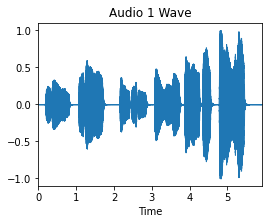

In [9]:
plt.figure(figsize=(4, 3))
plt.title("Audio 1 Wave")
librosa.display.waveplot(x_1, sr=fs_1)





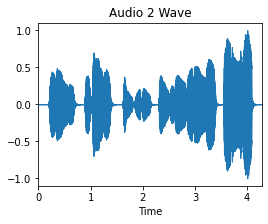

In [10]:
plt.figure(figsize=(4, 3))
plt.title("Audio 2 Wave")
librosa.display.waveplot(x_2, sr=fs_2)

After reading, we should get its chroma visualization. In music, the term chroma feature or chromagram closely relates to the twelve different pitch classes. Chroma-based features, which are also referred to as “pitch class profiles”, are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.

In [11]:
x_1_chroma = convert(x_1, fs_1)
x_2_chroma = convert(x_2, fs_2)

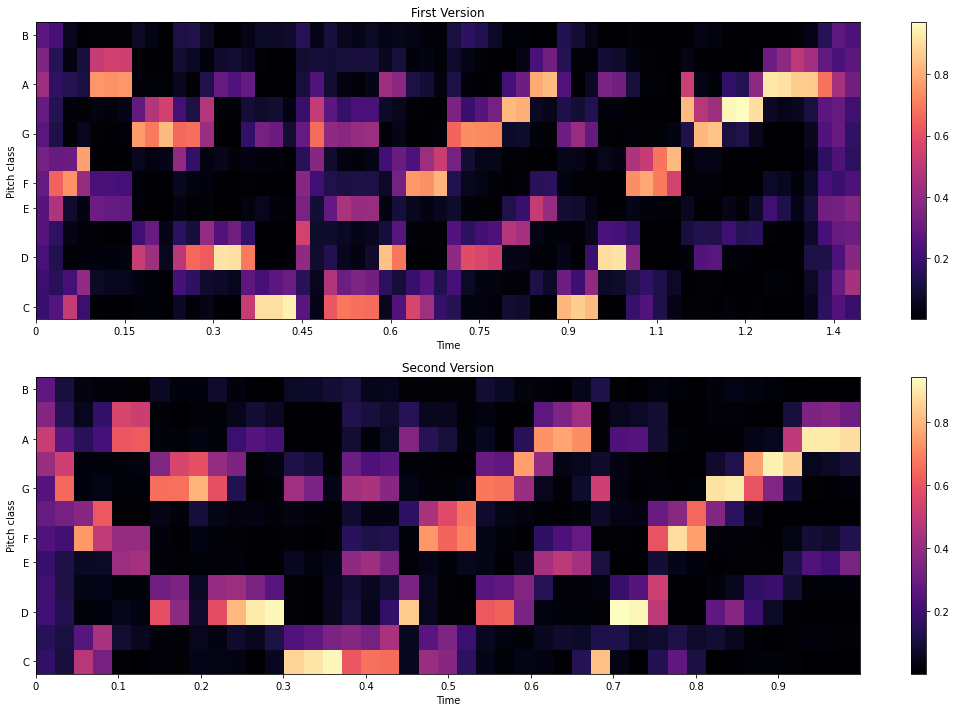

In [12]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title('First Version')
librosa.display.specshow(x_1_chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.subplot(212)
plt.title('Second Version')
librosa.display.specshow(x_2_chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.tight_layout()

As we can see, the notes are the same with audio.

In [40]:
def dtw_table(x, y, distance=None):
    if distance is None:
        distance = scipy.spatial.distance.euclidean
    nx = len(x)
    ny = len(y)
    table = np.zeros((nx+1, ny+1))
    
    # Compute left column separately, i.e. j=0.
    table[1:, 0] = np.inf
        
    # Compute top row separately, i.e. i=0.
    table[0, 1:] = np.inf
        
    # Fill in the rest.
    for i in range(1, nx+1):
        for j in range(1, ny+1):
            d = distance(x[i-1], y[j-1])
            table[i, j] = d + min(table[i-1, j], table[i, j-1], table[i-1, j-1])
    return table


D = dtw_table(x_1_chroma.T, x_2_chroma.T, distance=scipy.spatial.distance.cosine)

In [41]:

def compute_optimal_warping_path(D):
   
    N = D.shape[0]
    M = D.shape[1]
    n = N - 1
    m = M - 1
    P = [(n, m)]
    while n > 0 or m > 0:
        if n == 0:
            cell = (0, m - 1)
        elif m == 0:
            cell = (n - 1, 0)
        else:
            val = min(D[n-1, m-1], D[n-1, m], D[n, m-1])
            if val == D[n-1, m-1]:
                cell = (n-1, m-1)
            elif val == D[n-1, m]:
                cell = (n-1, m)
            else:
                cell = (n, m-1)
        P.append(cell)
        (n, m) = cell
    P.reverse()
    return np.array(P)
        
P = compute_optimal_warping_path(D)
print('Optimal warping path P =', P.tolist())

Optimal warping path P = [[0, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [2, 8], [3, 9], [4, 10], [5, 11], [6, 12], [7, 13], [8, 14], [9, 15], [9, 16], [9, 17], [9, 18], [10, 19], [11, 19], [12, 19], [13, 20], [14, 21], [14, 22], [14, 23], [14, 24], [14, 25], [14, 26], [14, 27], [14, 28], [14, 29], [14, 30], [14, 31], [14, 32], [14, 33], [14, 34], [14, 35], [14, 36], [14, 37], [14, 38], [14, 39], [14, 40], [14, 41], [15, 42], [16, 43], [17, 44], [17, 45], [18, 46], [19, 47], [20, 48], [21, 49], [22, 50], [23, 51], [24, 52], [24, 53], [24, 54], [24, 55], [24, 56], [24, 57], [24, 58], [24, 59], [24, 60], [24, 61], [24, 62], [24, 63], [24, 64], [24, 65], [24, 66], [24, 67], [25, 68], [26, 69], [27, 70], [27, 71], [28, 72], [29, 73], [30, 74], [31, 75], [31, 76], [31, 77], [31, 78], [31, 79], [31, 80], [31, 81], [31, 82], [31, 83], [31, 84], [31, 85], [31, 86], [31, 87], [31, 88], [32, 89], [33, 90], [34, 91], [35, 91], [36, 91], [37, 92], [37, 93], [38, 94], [38, 95], [38

In this circumstance, we have calculated DTW table and second function returns the path which pairs are the same in that point. We will use those points to visualize the same points on the graph.

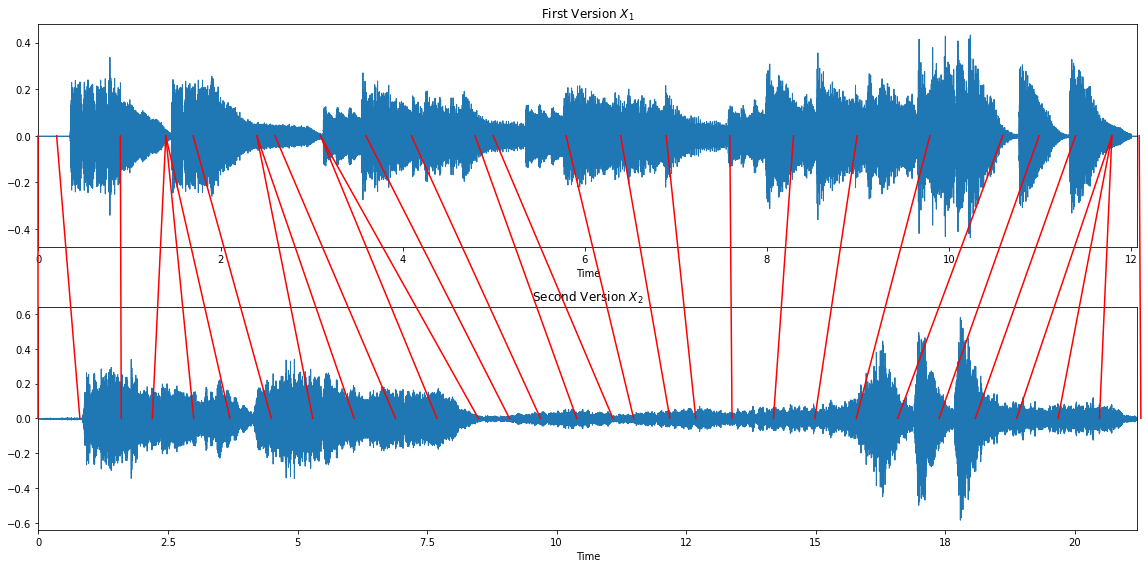

In [42]:
fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_1, sr=fs_1)
plt.title('First Version $X_1$')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_2, sr=fs_2)
plt.title('Second Version $X_2$')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
hop_size = 2205
points_idx = np.int16(np.round(np.linspace(0, P.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in P[points_idx] * hop_size / fs_1:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

In [43]:
# Get similar pathes
def distance_calculate(path,D):
  values=[]
  for points in path:
    x=D[points[0],points[1]]
   
    values.append(x)

    distance=sum(values)/len(path)
  return distance

p_list = P.tolist()
distance = distance_calculate(p_list, D)
 
print(f"Distance: {distance}")

Distance: 13.520145776741616


From our point of view, we have created function to calculate the similarity rate and for 2 audio files which has been indicated at the top.

As we can see, musical patterns, chords are the same but there is time difference. Therefore lines are not straight obviously. In all cases, algorithm returned the 0 points as well.

Now, let's check different another sound which have the same sentence but with different intonation and time.

In [21]:
x_1, fs_1 = read_audio("/content/drive/MyDrive/doors_1.wav")
x_2, fs_2 = read_audio("/content/drive/MyDrive/doors_2.wav")


ipd.Audio('/content/drive/MyDrive/doors_1.wav')


In [22]:
ipd.Audio('/content/drive/MyDrive/doors_2.wav')

In [24]:
# Get similar pathes
def distance_calculate(path,D):
  values=[]
  for points in path:
    x=D[points[0],points[1]]
   
    values.append(x)

    distance=sum(values)/len(path)
  return distance

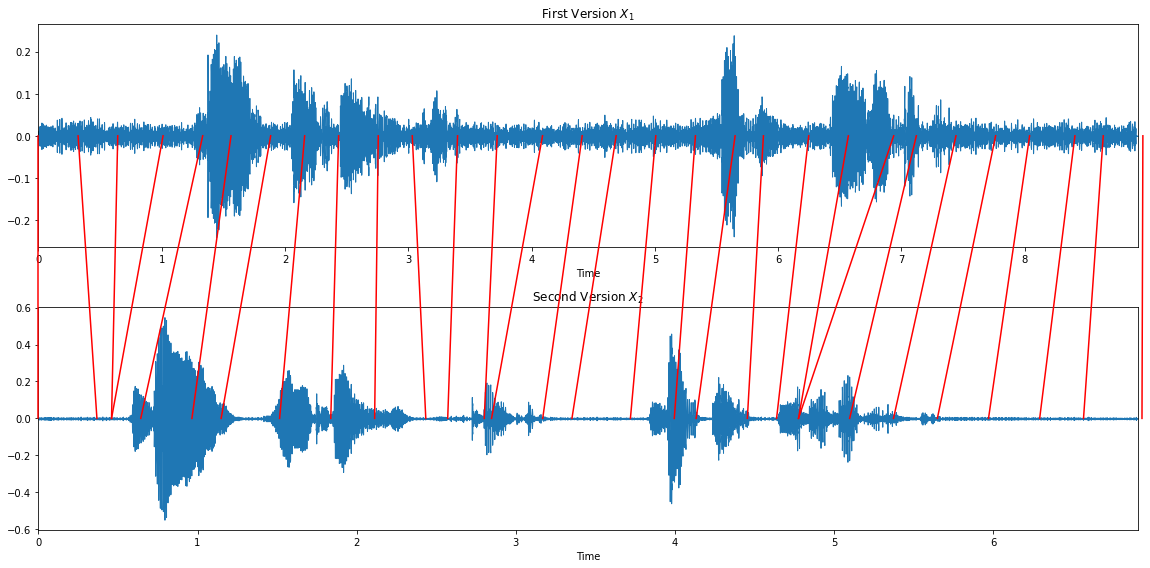

In [23]:
x_1_chroma = convert(x_1, fs_1)
x_2_chroma = convert(x_2, fs_2)
D = dtw_table(x_1_chroma.T, x_2_chroma.T, distance=scipy.spatial.distance.cosine)
P = compute_optimal_warping_path(D)

fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_1, sr=fs_1)
plt.title('First Version $X_1$')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_2, sr=fs_2)
plt.title('Second Version $X_2$')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
hop_size = 2205
points_idx = np.int16(np.round(np.linspace(0, P.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in P[points_idx] * hop_size / fs_1:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

In [38]:
p_list = P.tolist()
distance = distance_calculate(p_list, D)
 
print(f"Distance: {distance}")


Distance: 13.520145776741616


Now let's try the same kind of analsis with 2 music piece

In [33]:
x_1, fs_1 = read_audio("/content/drive/MyDrive/only_piano.mp3")
x_2, fs_2 = read_audio("/content/drive/MyDrive/orchestra.mp3")


ipd.Audio('/content/drive/MyDrive/only_piano.mp3')

In [34]:

ipd.Audio('/content/drive/MyDrive/orchestra.mp3')

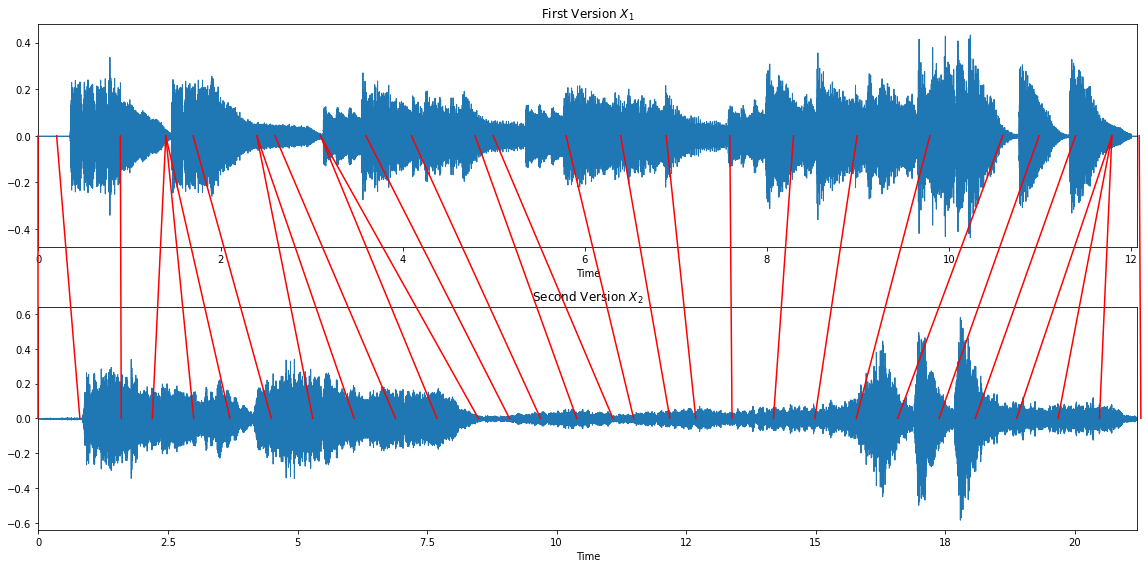

In [35]:


x_1_chroma = convert(x_1, fs_1)
x_2_chroma = convert(x_2, fs_2)
D = dtw_table(x_1_chroma.T, x_2_chroma.T, distance=scipy.spatial.distance.cosine)
P = compute_optimal_warping_path(D)

fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_1, sr=fs_1)
plt.title('First Version $X_1$')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_2, sr=fs_2)
plt.title('Second Version $X_2$')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
hop_size = 2205
points_idx = np.int16(np.round(np.linspace(0, P.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in P[points_idx] * hop_size / fs_1:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()

In [37]:
p_list = P.tolist()
distance = distance_calculate(p_list, D)
 
print(f"Distance: {distance}")

Distance: 13.520145776741616


Functions to plot data

Moreover, there are a lot of visualization tools and approaches for DTW. For example following example will illustrate possible results of DTW with the help of dtw library.

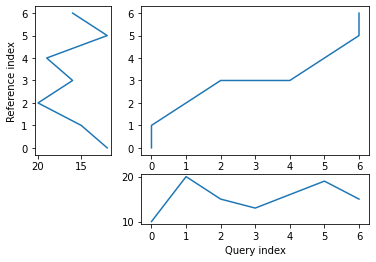

In [16]:
example_points_1 = [10, 20, 15, 13, 16, 19, 15]
example_points_2 = [12, 15, 20, 16, 19, 12, 16]

alignment = dtw(example_points_1, example_points_2, keep_internals=True)
alignment.plot(type="threeway")

This kind of visualizations, is mainly useful to indicate both signals and understand the optimal path graphically.

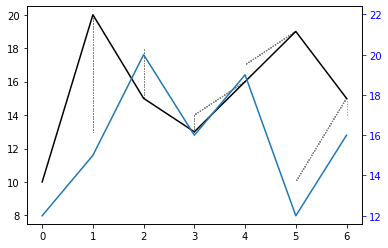

In [17]:
dtw(example_points_1, example_points_2, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

Above graph also is useful kind of graph to identify lines and points on the one graph.
<br/>
But in the audio example, we think this graph might not be useful.

[31. 30. 29.]
2


/usr/local/lib/python3.6/dist-packages/dtaidistance/dtw.py:392: RuntimeWarning: invalid value encountered in sqrt
  dtw = np.sqrt(dtw)


(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f7ff76233c8>])

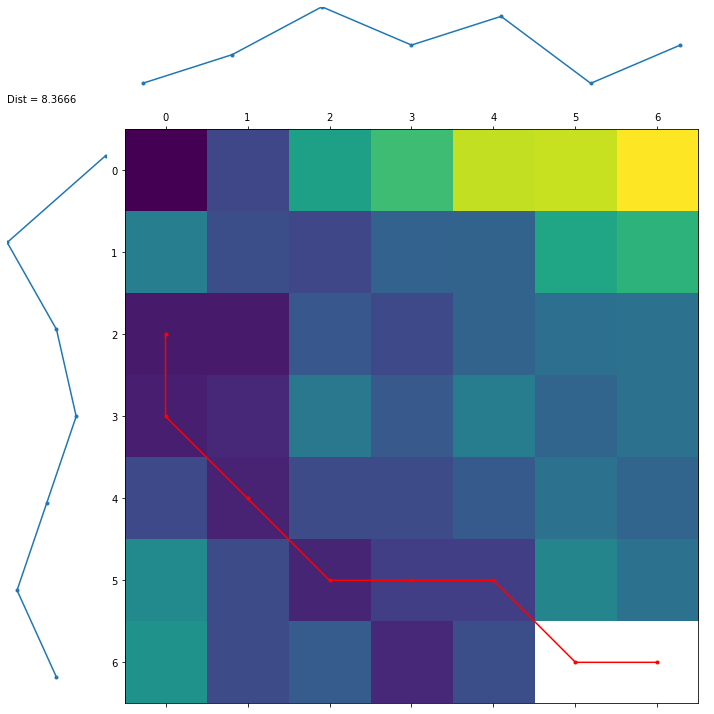

In [18]:
example_points_1 = np.array(example_points_1)
example_points_2 = np.array(example_points_2)
d, paths = dt.warping_paths(example_points_1, example_points_2, window=25, psi=2)
best_path = dt.best_path(paths)
dtwvis.plot_warpingpaths(example_points_1, example_points_2, paths, best_path)

Above graph also is the one of usefl graphs to visualize the DTW results.

<h2>Analyzing categorized sounds</h2>
<p>
In this section, we will analyze a lot of audio files from different categories to observe if category of audio affects similarity or not.

In our dataset, there are:
<ul>
  <li>Alternate has 58 audio file.</li>
  <li>Blues has 30 audio file.</li>
  <li>Electronic has 88 audio file.</li>
  <li>funksoulrnb has 46 audio file.</li>
  <li>Jazz has 124 audio file.</li>
  <li>Rock has 76 audio file.</li>
  <li>Rap has 74 audio file.</li>
</ul>
<br/>
Following code analyzes 2 audio file which are next to eachother in each category.
</p>

In [ ]:
drive.mount('/content/drive')

def dtw_table(x, y, distance=None):
    if distance is None:
        distance = scipy.spatial.distance.euclidean
    nx = len(x)
    ny = len(y)
    table = np.zeros((nx+1, ny+1))
    
    # Compute left column separately, i.e. j=0.
    table[1:, 0] = np.inf
        
    # Compute top row separately, i.e. i=0.
    table[0, 1:] = np.inf
        
    # Fill in the rest.
    for i in range(1, nx+1):
        for j in range(1, ny+1):
            d = distance(x[i-1], y[j-1])
            table[i, j] = d + min(table[i-1, j], table[i, j-1], table[i-1, j-1])
    return table


def compute_optimal_warping_path(D):
   
    N = D.shape[0]
    M = D.shape[1]
    n = N - 1
    m = M - 1
    P = [(n, m)]
    while n > 0 or m > 0:
        if n == 0:
            cell = (0, m - 1)
        elif m == 0:
            cell = (n - 1, 0)
        else:
            val = min(D[n-1, m-1], D[n-1, m], D[n, m-1])
            if val == D[n-1, m-1]:
                cell = (n-1, m-1)
            elif val == D[n-1, m]:
                cell = (n-1, m)
            else:
                cell = (n, m-1)
        P.append(cell)
        (n, m) = cell
    P.reverse()
    return np.array(P)


def distance_calculate(path,D):
  values=[]
  for points in path:
    x=D[points[0],points[1]]
   
    values.append(x)

    distance=sum(values)/len(path)
  return distance


BASE_DIR = "/content/drive/MyDrive/audio"

os.chdir(BASE_DIR)

categories = os.listdir()

audio_files = {}

report = [
    ['Audio 1', 'Audio 2', 'Genre', 'Distance', 'Running Time', 'Path'],
]



for cat in categories:
  os.chdir(f'{BASE_DIR}/{cat}')
  audios = os.listdir()
  audio_files[cat] = list(audios)
  print(f"{cat} has {len(audios)} audio file.")

plt.figure(figsize=(15, 5))
# get audio from each category
for i in audio_files:
  print(f"Genre {i}:")
  for j in range(0, len(audio_files[i]), 2):
    start = time.time()
    x_1, fs = librosa.load(f'{BASE_DIR}/{i}/{audio_files[i][j]}', sr=None)
    x_2, fs = librosa.load(f'{BASE_DIR}/{i}/{audio_files[i][j+1]}', sr=None)

    # Extracting audio signal features
    n_fft = 4410
    hop_size = 2205
    x_1_chroma = librosa.feature.chroma_stft(y=x_1, sr=fs, tuning=0, norm=2,
                                            hop_length=hop_size, n_fft=n_fft)
    x_2_chroma = librosa.feature.chroma_stft(y=x_2, sr=fs, tuning=0, norm=2,
                                            hop_length=hop_size, n_fft=n_fft)
    print(f"Comparing {audio_files[i][j]} and {audio_files[i][j+1]}")
    

    D = dtw_table(x_1_chroma.T, x_2_chroma.T, distance=scipy.spatial.distance.cosine)

    P = compute_optimal_warping_path(D)
    p_list = P.tolist()
    distance = distance_calculate(p_list, D)
    end = time.time()
    new_entry = [audio_files[i][j], audio_files[i][j+1], i, distance, end-start, p_list]
    report.append(new_entry)

df = pd.DataFrame(report)    
df.head()
# Read from drive

columns= df.iloc[0]
df = df[1:]
df.columns=columns
df.head()


Mounted at /content/drive
Alternate has 58 audio file.
Blues has 30 audio file.
Electronic has 88 audio file.
funksoulrnb has 46 audio file.
Jazz has 124 audio file.
Rock has 76 audio file.
Rap has 74 audio file.
Genre Alternate:
Comparing Abigail_Lapell-Dress_Rehearsal.mp3 and Albino_Catfish-Ice_Cream.mp3
Comparing Alex_Niedt-But_I_Love_You___.mp3 and Anders_Tengdahl-I_came_here_to_see_you.mp3
Comparing Anders_Tengdahl-When_You_Cry.mp3 and hayes-Asinimaha.mp3
Comparing Cabrini-Winter_2000.mp3 and cellophane_rain-orchid.mp3
Comparing Chance_-Say_What_You_Will.mp3 and Circle_the_Square-CPU.mp3
Comparing Common_Thrill-Morphine_Drip.mp3 and dallas_orbiter-Bed_of_Stars.mp3
Comparing dave_keegan-Do_That_Again.mp3 and Fake_Gimms-Simple_Facts.mp3
Comparing Fake_Gimms-The_Cell_Phone_Song.mp3 and Happy_Medium-Misty_blue.mp3
Comparing hostmom-it_s_close_up_far_away.mp3 and hostmom-supply_and_demand.mp3
Comparing hotpipes-The_Fatal_Egg.mp3 and Kunek-Section_2.mp3
Comparing laura_distasi-moonsong.

0                             Audio 1  ...                                               Path
1  Abigail_Lapell-Dress_Rehearsal.mp3  ...  [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 4...
2    Alex_Niedt-But_I_Love_You___.mp3  ...  [[0, 0], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1...
3    Anders_Tengdahl-When_You_Cry.mp3  ...  [[0, 0], [1, 1], [2, 2], [3, 2], [4, 2], [5, 3...
4             Cabrini-Winter_2000.mp3  ...  [[0, 0], [1, 1], [2, 2], [3, 2], [4, 2], [5, 2...
5       Chance_-Say_What_You_Will.mp3  ...  [[0, 0], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1...

[5 rows x 6 columns]

<Figure size 1080x360 with 0 Axes>

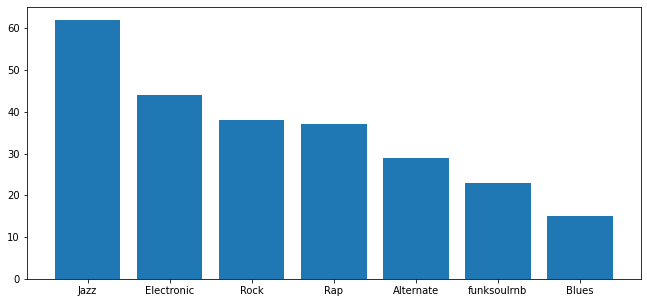

In [ ]:
# Visualization
num_genre = df["Genre"].unique().shape[0]
num_comparison_in_genre = df["Genre"].value_counts()
fig, axs = plt.subplots(figsize=(11, 5), sharey=True)
plt.bar(dict(num_comparison_in_genre).keys(), dict(num_comparison_in_genre).values())
plt.show()

df['Distance'] = df['Distance'].astype(float)
df['Running Time'] = df['Running Time'].astype(float)

In [ ]:
a = df.groupby('Genre').agg({'Distance': ['mean', 'min', 'max']})
print("Minimum Maximum and Mean distance for each genre of audio based on our test")
print(a)

#==============================
b = df.groupby('Genre').agg({'Running Time': ['mean', 'min', 'max']})
print("\nMinimum Maximum and Mean Running Time for each genre of audio based on our test")
print(b)
#==============================

Minimum Maximum and Mean distance for each genre of audio based on our test
              Distance                      
                  mean        min        max
Genre                                       
Alternate    29.690435  17.585417  55.633175
Blues        31.143393  21.819273  41.326052
Electronic   27.819804  11.733574  50.261814
Jazz         34.664869  21.435924  55.631630
Rap          25.373154  17.085958  38.915742
Rock         24.503906  16.936822  42.427653
funksoulrnb  27.923062  20.808604  41.511642

Minimum Maximum and Mean Running Time for each genre of audio based on our test
            Running Time                     
                    mean       min        max
Genre                                        
Alternate       2.792848  2.491158   4.749590
Blues           2.680743  2.527461   2.817962
Electronic      2.651591  2.443532   3.059587
Jazz            2.769002  2.472174   4.218421
Rap             2.918404  2.485776  11.277888
Rock            2.673384 

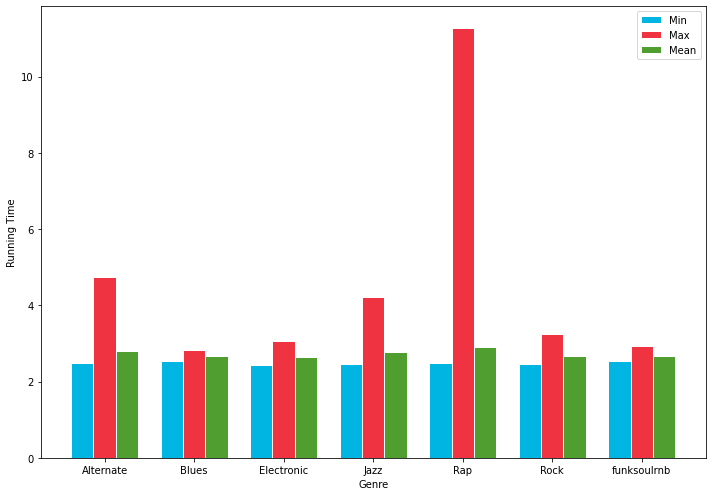

In [ ]:
barWidth = 0.25
fig, ax = plt.subplots(figsize=(10,7))
# set height of bar
bars1 = list(dict(b[('Running Time', 'min')]).values())
bars2 = list(dict(b[('Running Time', 'max')]).values())
bars3 = list(dict(b[('Running Time', 'mean')]).values())
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#00b5e2', width=barWidth, edgecolor='white', label='Min')
plt.bar(r2, bars2, color='#ef3340', width=barWidth, edgecolor='white', label='Max')
plt.bar(r3, bars3, color='#509e2f', width=barWidth, edgecolor='white', label='Mean')
 
# Add xticks on the middle of the group bars
plt.xlabel('Genre')
plt.ylabel('Running Time')
plt.xticks([r + barWidth for r in range(len(bars1))], list(dict(b[('Running Time', 'min')]).keys()))
plt.tight_layout()

# Create legend & Show graphic
plt.legend()
plt.show()

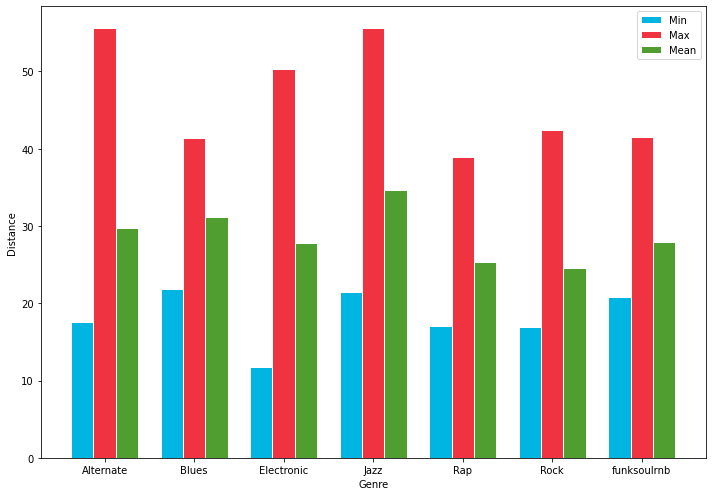

In [ ]:
barWidth = 0.25
fig, ax = plt.subplots(figsize=(10,7))
# set height of bar
bars1 = list(dict(a[('Distance', 'min')]).values())
bars2 = list(dict(a[('Distance', 'max')]).values())
bars3 = list(dict(a[('Distance', 'mean')]).values())
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#00b5e2', width=barWidth, edgecolor='white', label='Min')
plt.bar(r2, bars2, color='#ef3340', width=barWidth, edgecolor='white', label='Max')
plt.bar(r3, bars3, color='#509e2f', width=barWidth, edgecolor='white', label='Mean')
 
# Add xticks on the middle of the group bars
plt.xlabel('Genre')
plt.ylabel('Distance')
plt.xticks([r + barWidth for r in range(len(bars1))], list(dict(a[('Distance', 'min')]).keys()))
plt.tight_layout()

# Create legend & Show graphic
plt.legend()
plt.show()

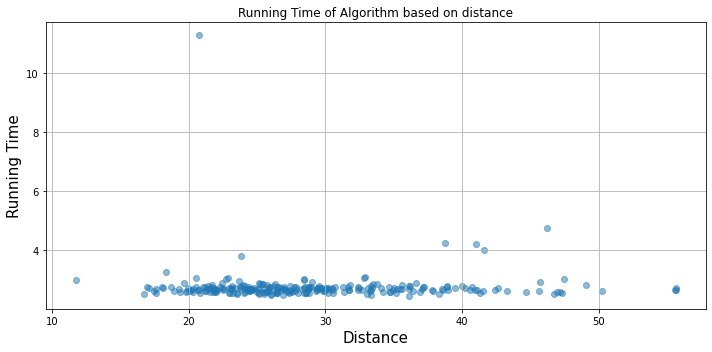

In [ ]:
# visualize scatter plot runtime and distance
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['Distance'], df['Running Time'], alpha=0.5)

ax.set_xlabel('Distance', fontsize=15)
ax.set_ylabel('Running Time', fontsize=15)
ax.set_title('Running Time of Algorithm based on distance')

ax.grid(True)

fig.tight_layout()

**Evaluation**

In this section, we will use different sample audio files to analyze the similarity scale.

In the end we tested our algorithm around 500 audio files and the audio files which has different speed pace.<br/>
Here is the results
<br/>
Our algorithm returns distance value 0 if the audios
are completely same
<br/>
Returns distance value between 10 15 if the
audios are the same but in different speed
<br/>
Returns distance value greater than 30 if the two
audios are completely different than each other

**Future application areas**

DTW Algorithm can be applied in signal processing, audio processing, generally on all time series data. In future, we would like to apply this algorithm to create web application which users can check audios to get detailed information about chord progression, similarities, and other audio information. Also, we would like to collect dataset and analyze audios to create similarity table.

**Conclusion**

In conclusion, it is undeniable that audio processing require attention because future demans are going to increase speech recognition, audio systems and so on. 
<br/>
We enjoyed during this project to search about musical information, how it works, etc.
<br/>
Music is relaxation. Stay with science, Stay with music.

<h3>Thank You</h3>
<h2>Kayahan Kaya, Hashim Hashimov</h2>
<h1>Analyzing audio patterns with Dynamic Time Warping</h1>